In [114]:
from utils import get_tickers_from_market_index

idiv = get_tickers_from_market_index("./assets/IDIV-composition.csv")

len(idiv)

51

In [115]:
tickers_code = [f"{ticker}.SA" for ticker in idiv]
tickers_code

['ABCB4.SA',
 'ALUP11.SA',
 'AURE3.SA',
 'B3SA3.SA',
 'BRSR6.SA',
 'BBSE3.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'AGRO3.SA',
 'CXSE3.SA',
 'CMIG3.SA',
 'CMIG4.SA',
 'CSMG3.SA',
 'CPLE3.SA',
 'CPLE6.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'DIRR3.SA',
 'EGIE3.SA',
 'FESA4.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GRND3.SA',
 'RANI3.SA',
 'ITSA4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KEPL3.SA',
 'KLBN11.SA',
 'LAVV3.SA',
 'MRFG3.SA',
 'LEVE3.SA',
 'BEEF3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PSSA3.SA',
 'RAPT4.SA',
 'ROMI3.SA',
 'SANB11.SA',
 'CSNA3.SA',
 'TAEE11.SA',
 'TASA4.SA',
 'TGMA3.SA',
 'VIVT3.SA',
 'TRPL4.SA',
 'TRIS3.SA',
 'UNIP6.SA',
 'USIM5.SA',
 'VALE3.SA',
 'WIZC3.SA']

## Obter os dados de dividendos

In [116]:
import yfinance as yf

tickers = yf.Tickers(tickers_code).tickers

In [117]:
import pandas as pd

all_dividends = pd.DataFrame()

for ticker, data in tickers.items():
    per_month_df = data.actions.groupby(pd.Grouper(freq="M")).sum()
    dividend_df = per_month_df.iloc[:, 0].to_frame()
    dividend_df.rename(columns={'Dividends': ticker}, inplace=True)

    if all_dividends.empty:
        all_dividends = dividend_df
        continue
    
    all_dividends = all_dividends.merge(dividend_df, left_index=True, right_index=True, how='outer')
    all_dividends.fillna(0, inplace=True)

all_dividends.reset_index(inplace=True)
all_dividends.set_index("Date", inplace=True)
all_dividends.index = pd.to_datetime(all_dividends.index)

all_dividends

,ABCB4.SA,ALUP11.SA,AURE3.SA,B3SA3.SA,BRSR6.SA,BBSE3.SA,BRAP4.SA,BBAS3.SA,AGRO3.SA,CXSE3.SA,...,TAEE11.SA,TASA4.SA,TGMA3.SA,VIVT3.SA,TRPL4.SA,TRIS3.SA,UNIP6.SA,USIM5.SA,VALE3.SA,WIZC3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-31 00:00:00-03:00,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2000-04-30 00:00:00-03:00,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2000-05-31 00:00:00-03:00,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2000-06-30 00:00:00-03:00,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2000-07-31 00:00:00-03:00,0.000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 00:00:00-03:00,0.000,0.00,0.0,0.115354,0.342607,0.000000,0.0,0.993051,0.0,0.0,...,0.000000,0.0,0.00,0.192782,0.0,0.0,0.0,0.0,0.000000,0.0
2023-07-31 00:00:00-03:00,0.836,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2023-08-31 00:00:00-03:00,0.000,0.12,0.0,0.000000,0.000000,1.607637,0.0,0.668883,0.0,0.0,...,0.909844,0.1,0.57,0.244259,0.0,0.0,0.0,0.0,1.918472,0.0


In [118]:
all_dividends.to_csv("./assets/idiv_companies_dividends.csv")

## ## Agrupamento com base no dividendo

Classificações:
- Dividendo alto
- Dividendo moderado
- Dividendo baixo

In [137]:
all_dividends = pd.read_csv("./assets/idiv_companies_dividends.csv")
all_dividends.set_index("Date", inplace=True)

In [123]:
import plotly.express as px

fig = px.line(all_dividends, x=all_dividends.index, y=all_dividends.columns[:5])
fig.update_layout(title="Dividendo das empresas listados em bolsa",
                  xaxis_title="Data",
                  yaxis_title="Valor")
fig.show()

In [124]:
total_dividend = all_dividends.sum().to_frame("Dividend")
total_dividend

,Dividend
ABCB4.SA,9.904649
ALUP11.SA,9.446915
AURE3.SA,1.586049
B3SA3.SA,4.543908
BRSR6.SA,12.106016
BBSE3.SA,21.857815
BRAP4.SA,26.152799
BBAS3.SA,28.110513
AGRO3.SA,12.620133
CXSE3.SA,1.403551


In [126]:
px.box(total_dividend)

In [127]:
total_dividend.drop("CPLE6.SA", inplace=True)
total_dividend

,Dividend
ABCB4.SA,9.904649
ALUP11.SA,9.446915
AURE3.SA,1.586049
B3SA3.SA,4.543908
BRSR6.SA,12.106016
BBSE3.SA,21.857815
BRAP4.SA,26.152799
BBAS3.SA,28.110513
AGRO3.SA,12.620133
CXSE3.SA,1.403551


In [128]:
total_dividend.describe()

,Dividend
count,50.000000
mean,13.580991
std,11.766245
min,1.403551
25%,5.305141
50%,10.202308
75%,16.853709
max,48.908696


In [147]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
total_dividend_scaled = scaller.fit_transform(total_dividend.to_numpy())
total_dividend_scaled

array([[-0.31562037],
       [-0.35491763],
       [-1.02978659],
       [-0.77584927],
       [-0.1266292 ],
       [ 0.71057965],
       [ 1.07931147],
       [ 1.24738461],
       [-0.08249136],
       [-1.04545436],
       [-0.05483285],
       [-0.19723194],
       [-0.2645112 ],
       [-0.77845376],
       [ 0.79500006],
       [-1.00813487],
       [-0.61357954],
       [ 1.32661726],
       [-0.02454565],
       [-0.49783003],
       [ 0.01246409],
       [ 0.11305253],
       [-0.69593977],
       [-0.95124539],
       [-0.68159077],
       [-0.44467398],
       [-0.93328659],
       [-0.81765538],
       [-0.5746529 ],
       [-1.03050715],
       [-0.52177613],
       [ 0.28909572],
       [-0.90743508],
       [ 1.73171115],
       [ 2.03797673],
       [ 0.18245044],
       [-0.85461008],
       [-0.60569311],
       [ 0.62890589],
       [ 0.00533831],
       [ 1.62066245],
       [-0.55345336],
       [-0.25153849],
       [ 3.03294466],
       [ 0.25658676],
       [-1

In [148]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=3)
cluster_model.fit(total_dividend_scaled)

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [158]:
centers = cluster_model.cluster_centers_
centers = scaller.inverse_transform(centers).ravel()
centers = sorted(centers)
centers

[4.798211541666667, 14.729395647058823, 34.83252977777778]

In [159]:
import numpy as np

labels = cluster_model.labels_
np.unique(np.array(labels), return_counts=True)

(array([0, 1, 2], dtype=int32), array([17,  9, 24]))

In [160]:
import plotly.graph_objects as go

classification_legend = [
  "Dividendos Baixo", # 0
  "Dividendos Moderado", # 1
  "Dividendos Alto" # 2
]

graph1 = px.scatter(total_dividend, x = total_dividend.index, y = total_dividend.columns, color=labels)
graph2 = px.scatter(x = classification_legend, y = centers, size=[12, 12, 12])
graph3 = go.Figure(data = graph1.data + graph2.data)
graph3.show()

In [161]:
classification = np.column_stack((total_dividend, labels))
classification_df = pd.DataFrame(classification, columns=["Dividend", "Classification"])

In [162]:
classified_all_dividends = pd.merge(total_dividend, classification_df, on="Dividend", how="left")
classified_all_dividends.index = total_dividend.index
classified_all_dividends.sort_values(by="Dividend", ascending=True)

,Dividend,Classification
CXSE3.SA,1.403551,2.0
TRIS3.SA,1.558536,2.0
LAVV3.SA,1.577656,2.0
AURE3.SA,1.586049,2.0
CMIN3.SA,1.838248,2.0
RANI3.SA,2.500896,2.0
JHSF3.SA,2.710080,2.0
BEEF3.SA,3.011198,2.0
RAPT4.SA,3.626503,2.0
KEPL3.SA,4.056951,2.0


In [166]:
possible_classifications = len(classification_legend)
classified_tickers = [[0]] * possible_classifications

for i in range(possible_classifications):
  filtered_df = classified_all_dividends[classified_all_dividends["Classification"] == i]
  classified_tickers[i] = filtered_df.index.to_list()

classified_tickers

[['ABCB4.SA',
  'BRSR6.SA',
  'BBSE3.SA',
  'AGRO3.SA',
  'CMIG3.SA',
  'CMIG4.SA',
  'CSMG3.SA',
  'CPFE3.SA',
  'FESA4.SA',
  'GGBR4.SA',
  'GOAU4.SA',
  'LEVE3.SA',
  'PSSA3.SA',
  'SANB11.SA',
  'CSNA3.SA',
  'TGMA3.SA',
  'TRPL4.SA'],
 ['BRAP4.SA',
  'BBAS3.SA',
  'EGIE3.SA',
  'PETR3.SA',
  'PETR4.SA',
  'TAEE11.SA',
  'VIVT3.SA',
  'UNIP6.SA',
  'VALE3.SA'],
 ['ALUP11.SA',
  'AURE3.SA',
  'B3SA3.SA',
  'CXSE3.SA',
  'CPLE3.SA',
  'CMIN3.SA',
  'DIRR3.SA',
  'FLRY3.SA',
  'GRND3.SA',
  'RANI3.SA',
  'ITSA4.SA',
  'JBSS3.SA',
  'JHSF3.SA',
  'KEPL3.SA',
  'KLBN11.SA',
  'LAVV3.SA',
  'MRFG3.SA',
  'BEEF3.SA',
  'RAPT4.SA',
  'ROMI3.SA',
  'TASA4.SA',
  'TRIS3.SA',
  'USIM5.SA',
  'WIZC3.SA']]

## Treinamento do modelo para cada classificação de dividendos

In [203]:
from prophet import Prophet

ts_models = []

for i, _ in enumerate(classification_legend):
  df = all_dividends[classified_tickers[i]].mean(axis=1).to_frame()
  df.reset_index(inplace=True)
  df.rename(columns={"Date": "ds", 0: "y"}, inplace=True)
  df["ds"] = pd.to_datetime(df["ds"], utc=True).dt.tz_convert(None)

  model = Prophet()
  model.fit(df)
  ts_models.append(model)

00:11:44 - cmdstanpy - INFO - Chain [1] start processing
00:11:44 - cmdstanpy - INFO - Chain [1] done processing
00:11:44 - cmdstanpy - INFO - Chain [1] start processing
00:11:44 - cmdstanpy - INFO - Chain [1] done processing
00:11:44 - cmdstanpy - INFO - Chain [1] start processing
00:11:44 - cmdstanpy - INFO - Chain [1] done processing


## Previsão de dividendos

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Projects/3A-ai/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/gabriel/Proje

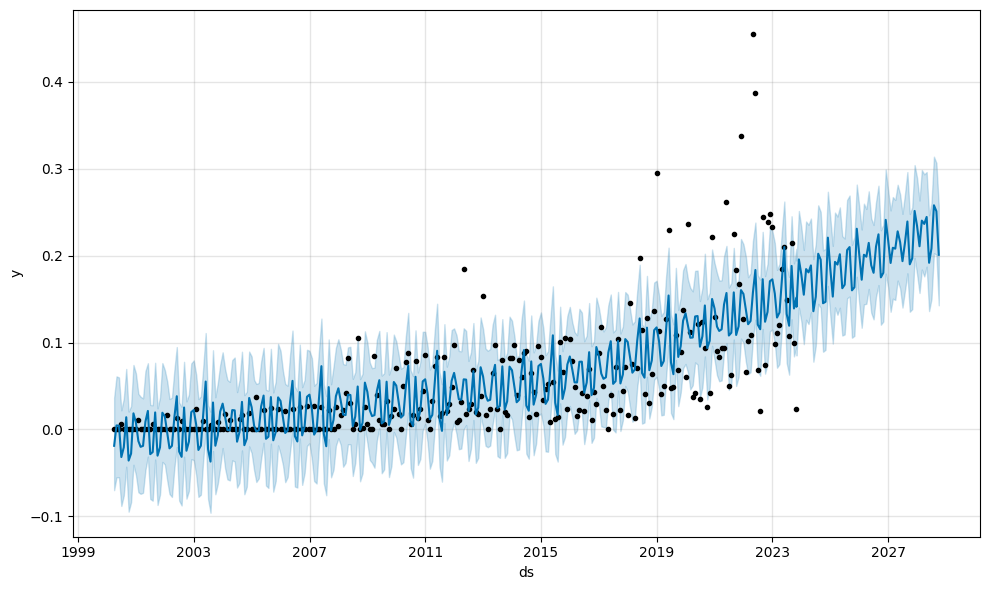

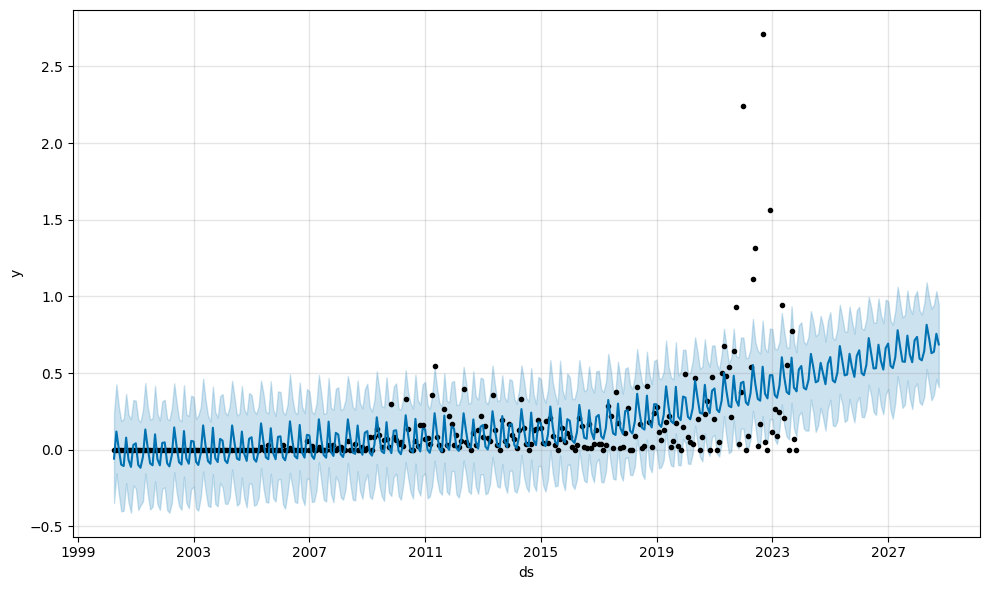

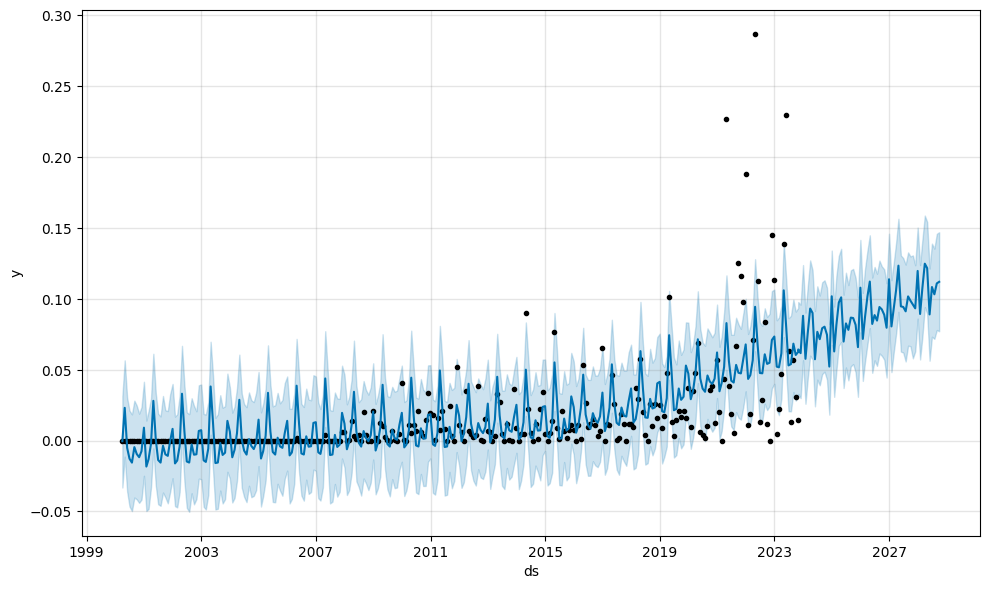

In [209]:
for model in ts_models:
  future = model.make_future_dataframe(periods=12 * 5, freq="MS")
  forecast = model.predict(future)
  model.plot(forecast)